<font size="6"> <b>The Pursuit of Happiness: between fiction and reality<b> </font>

### _Understanding how to make people happier through data_
Author: Steven Mariani <br>
Context: Start2Impact Data Manipulation and Visualization Project

# **Discovery**

## The aim

The "Happiness" is a complex concept that follows humans from thousands and thousands of years.

Aristotle, Plato and Epicurus are notable examples of philosophers who dedicated effort trying to understand what "happines" means for humanity. 
In their era, knowledge and techology were not as developed as today, which limited their ability to fully answer these profound questions.

Nowadays we are able to analyse, much of time for free, a large amount of data collected all around the world spreading humans' possibilities to answer complex question as the previous one.

The aim of this document is understand how socio-economic factors predict the humans happiness.

## Libraries import

In [1]:
# Libraries import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import networkx as nx

import scipy
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.preprocessing import StandardScaler

import geopandas as gpd

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Data Selection**

## The resources

In this document we will try to understand how social-economic factors explain the happiness using 2 famous resources:

1. The **World Happiness Report**, that is an annual publication that measures and ranks the happiness levels of countries around the world. It is produced by Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network and the WHR’s Editorial Board. <br>

2. The **Human Freedom Index**, a global measurement that presents a broad view of human freedom, ranks countries based on the level of personal and economic freedoms that their citizens enjoy, combining scores on various aspects of freedom into an overall score. Typically published by organizations like the Cato Institute, the Fraser Institute, and the Friedrich Naumann Foundation for Freedom.

### World Happiness Score

The key components measured in the World Happiness Report include: <br> 

a. **Income**: GDP per capita, which reflects the standard of living; <br> 
b. **Social Support**: Having someone to count on in times of trouble; <br> 
c. **Healthy Life Expectancy**: Life expectancy adjusted for the number of healthy years; <br> 
d. **Freedom to Make Life Choices**: The perceived freedom to make decisions about one's own life; <br> 
e. **Generosity**: Donations to charity and willingness to help others; <br> 
f. **Perceptions of Corruption**: Trust in government and business. <br> 

We selected all the available happiness data from [Kaggle](https://www.kaggle.com/datasets/unsdsn/world-happiness/data). <br>
We used data that refer to years between 2015 and 2019.

In [3]:
# Import all databases' csv

df_whr_2015 = pd.read_csv('2015.csv')
df_whr_2016 = pd.read_csv('2016.csv')
df_whr_2017 = pd.read_csv('2017.csv')
df_whr_2018 = pd.read_csv('2018.csv')
df_whr_2019 = pd.read_csv('2019.csv')

In [4]:
# Print all the df infos

dataframes = [df_whr_2015, df_whr_2016, df_whr_2017, df_whr_2018, df_whr_2019]

for x in dataframes:
    x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
# Print descriptive informations

df_whr_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
# Print descriptive informations

df_whr_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [7]:
# Print descriptive informations

df_whr_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [8]:
# Print descriptive informations

df_whr_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [9]:
# Print descriptive informations

df_whr_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### The Human Freedom Index

The main components measured in the Human Freedom Index are:

a. **Personal Freedom**: include aspects related to individual liberties and social freedoms such as:

i. **Rule of Law**: Measures the degree to which individuals have protection under the law, including judicial independence and the extent of police control. <br>
ii. **Security and Safety**: Evaluates the level of protection from violence and conflict, including the prevalence of crime and the likelihood of terrorism or violent demonstrations. <br>
iii. **Movement**: Assesses the freedom of movement both within a country and internationally, including controls on foreign travel, relocation, and emigration.  <br>
iv. **Religion**: Looks at the extent to which individuals can practice their religion freely, without government intervention or societal oppression. <br>
v. **Association, Assembly, and Civil Society**: Considers the freedoms of assembly and expression, as well as the ability to form and join organizations. <br>
vi. **Expression and Information**: Evaluates the freedom of speech and access to information, including the independence of the media and the presence of censorship. <br>
vii. **Identity and Relationships**: Measures freedoms related to social relationships, including gender and family rights, such as same-sex relationships and women's rights. <br>

b. **Economic Freedom**

i. **Size of Government**: Assesses the extent of government involvement in the economy, including government spending, taxation, and state-owned enterprises. <br>
ii. **Legal System and Property Rights**: Evaluates the quality of the legal framework for securing property rights and the independence of the judiciary. <br>
iii. **Access to Sound Money**: Looks at the stability of a country’s currency and the extent of inflation. <br>
iv. **Freedom to Trade Internationally**: Measures the level of tariffs, trade barriers, and regulatory constraints on foreign trade. <br>
v. **Regulation of Credit, Labor, and Business**: Considers the regulatory environment affecting credit markets, labor freedom, and the ease of starting and running a business. <br>

We selected the most recent dataset from [Kaggle](https://www.kaggle.com/datasets/gsutters/the-human-freedom-index). <br>

In [10]:
# Import the dataset

df_hfi_2008to2022 = pd.read_csv('hfi_cc_2022.csv')

In [11]:
# Print infos

df_hfi_2008to2022.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 141 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    year                                  3465 non-null   int64  
 1    countries                             3465 non-null   object 
 2    region                                3465 non-null   object 
 3    hf_score                              3083 non-null   float64
 4    hf_rank                               3083 non-null   float64
 5    hf_quartile                           3083 non-null   float64
 6    pf_rol_procedural                     1390 non-null   float64
 7    pf_rol_civil                          1390 non-null   float64
 8    pf_rol_criminal                       1390 non-null   float64
 9    pf_rol_vdem                           3402 non-null   float64
 10   pf_rol                                3417 non-null   float64
 11   pf

In [12]:
# Print descriptive informations

df_hfi_2008to2022.describe()

,year,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,pf_rol,pf_ss_homicide,pf_ss_homicide_data,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,pf_ss_disappearances_injuries_data,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion_suppression,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_expression_direct_killed,pf_expression_direct_killed_data,pf_expression_direct_jailed,pf_expression_direct_jailed_data,pf_expression_direct,pf_expression_vdem_cultural,pf_expression_vdem_harass,pf_expression_vdem_gov,pf_expression_vdem_internet,pf_expression_vdem_selfcens,pf_expression_vdem,pf_expression_house,pf_expression_bti,pf_expression_cld,pf_expression,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity_fgm,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_consumption_data,ef_government_transfers,ef_government_transfers_data,ef_government_investment,ef_government_investment_data,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_gender,ef_legal,ef_money_growth,ef_money_growth_data,ef_money_sd,ef_money_sd_data,ef_money_inflation,ef_money_inflation_data,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_revenue_data,ef_trade_tariffs_mean,ef_trade_tariffs_mean_data,ef_trade_tariffs_sd,ef_trade_tariffs_sd_data,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_open,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
count,3465.000000,3083.000000,3083.000000,3083.000000,1390.000000,1390.000000,1390.000000,3402.000000,3417.000000,3417.000000,3417.000000,3415.000000,3465.000000,3465.000000,1971.000000,3465.000000,3465.000000,3465.000000,3465.000000,3402.000000,3402.000000,3465.000000,3465.000000,3402.000000,3402.000000,3402.000000,3402.000000,3432.000000,3465.000000,3402.000000,3432.000000,3465.000000,3402.000000,3465.000000,3402.000000,3465.000000,2495.000000,3432.000000,3465.000000,3402.000000,3402.000000,3319.000000,3402.000000,3402.000000,3465.000000,3465.000000,3465.000000,3465.000000,3465.000000,3465.000000,3402.000000,3402.000000,3402.000000,3398.000000,3402.000000,3402.000000,3.465000e+03,2495.000000,3432.000000,3465.000000,3143.000000,3154.000000,3160.000000,3444.000000,917.000000,917.000000,3081.000000,3160.000000,3455.000000,3083.000000,3083.000000,3128.000000,3128.000000,2919.000000,2919.000000,3250.000000,3250.000000,2899.000000,2728.000000,2899.000000,3344.000000,3366.000000,3408.000000,3408.000000,3390.000000,3141.000000,3402.000000,3400.00000

# **Data Cleaning**

## World Happiness Score

In [13]:
# Create a new column for each df with the df related year

df_whr_2015['year'] = 2015
df_whr_2016['year'] = 2016
df_whr_2017['year'] = 2017
df_whr_2018['year'] = 2018
df_whr_2019['year'] = 2019

### Column name normalizing

The first step of the data cleaning process is normalize the column name of every sub dataset.

In [14]:
# Normalizing columns' name for 2015 dataframe

df_whr_2015_new = df_whr_2015[['Happiness Rank',
                                'Country',
                                'Happiness Score',
                                'Economy (GDP per Capita)',
                                'Family',
                                'Health (Life Expectancy)',
                                'Freedom',
                                'Generosity',
                                'Trust (Government Corruption)',
                                'year']].copy()

df_whr_2015_new = df_whr_2015_new.rename(columns={
    'Happiness Rank':'overall_rank',
    'Country':'country',
    'Happiness Score':'score',
    'Family':'social_support',
    'Economy (GDP per Capita)':'gdp_per_capita',
    'Health (Life Expectancy)':'healthy_life_expectancy',
    'Freedom':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Trust (Government Corruption)':'perceptions_of_corruption'})

In [15]:
# Normalizing columns' name for 2016 dataframe

df_whr_2016_new = df_whr_2016[['Happiness Rank',
                                'Country',
                                'Happiness Score',
                                'Economy (GDP per Capita)',
                                'Family',
                                'Health (Life Expectancy)',
                                'Freedom',
                                'Generosity',
                                'Trust (Government Corruption)',
                                'year']].copy()

df_whr_2016_new = df_whr_2016_new.rename(columns={
    'Happiness Rank':'overall_rank',
    'Country':'country',
    'Happiness Score':'score',
    'Family':'social_support',
    'Economy (GDP per Capita)':'gdp_per_capita',
    'Health (Life Expectancy)':'healthy_life_expectancy',
    'Freedom':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Trust (Government Corruption)':'perceptions_of_corruption'})

In [16]:
# Normalizing columns' name for 2017 dataframe

df_whr_2017_new = df_whr_2017[['Happiness.Rank',
                                'Country',
                                'Happiness.Score',
                                'Economy..GDP.per.Capita.',
                                'Family',
                                'Health..Life.Expectancy.',
                                'Freedom',
                                'Generosity',
                                'Trust..Government.Corruption.',
                                'year']].copy()

df_whr_2017_new = df_whr_2017_new.rename(columns={
    'Happiness.Rank':'overall_rank',
    'Country':'country',
    'Happiness.Score':'score',
    'Family':'social_support',
    'Economy..GDP.per.Capita.':'gdp_per_capita',
    'Health..Life.Expectancy.':'healthy_life_expectancy',
    'Freedom':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Trust..Government.Corruption.':'perceptions_of_corruption'})

In [17]:
# Normalizing columns' name for 2018 and 2019 dataframe

df_whr_2018 = df_whr_2018.rename(columns={
    'Overall rank':'overall_rank',
    'Country or region':'country',
    'Score':'score',
    'Social support':'social_support',
    'GDP per capita':'gdp_per_capita',
    'Healthy life expectancy':'healthy_life_expectancy',
    'Freedom to make life choices':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'})

df_whr_2019 = df_whr_2019.rename(columns={
    'Overall rank':'overall_rank',
    'Country or region':'country',
    'Score':'score',
    'Social support':'social_support',
    'GDP per capita':'gdp_per_capita',
    'Healthy life expectancy':'healthy_life_expectancy',
    'Freedom to make life choices':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'})

### Countries names standardizing

In the year between 2015 and 2019 some nations has changed their name, others are not always being in the dataset.
For this reason the next step of the data cleaning is standardize every country name.

In [18]:
# Checking countries' names

list_df_whr_country_2015 = set(df_whr_2015_new['country'])
list_df_whr_country_2016 = set(df_whr_2016_new['country'])
list_df_whr_country_2017 = set(df_whr_2017_new['country'])
list_df_whr_country_2018 = set(df_whr_2018['country'])
list_df_whr_country_2019 = set(df_whr_2019['country'])

list_df_whr_all_countries = list_df_whr_country_2015 | list_df_whr_country_2016 | list_df_whr_country_2017 | list_df_whr_country_2018 | list_df_whr_country_2019

delta_2015 = list_df_whr_all_countries - list_df_whr_country_2015
delta_2016 = list_df_whr_all_countries - list_df_whr_country_2016
delta_2017 = list_df_whr_all_countries - list_df_whr_country_2017
delta_2018 = list_df_whr_all_countries - list_df_whr_country_2018
delta_2019 = list_df_whr_all_countries - list_df_whr_country_2019

# Countries or not present in every dataset or with different names

print(f'2015: {delta_2015}, \n \n 2016: {delta_2016}, \n \n  2017: {delta_2017}, \n \n  2018: {delta_2018}, \n \n 2019: {delta_2019}')

2015: {'Somaliland Region', 'Somalia', 'Gambia', 'Belize', 'Northern Cyprus', 'Taiwan Province of China', 'Trinidad & Tobago', 'South Sudan', 'North Macedonia', 'Hong Kong S.A.R., China', 'Namibia', 'Puerto Rico'}, 
 
 2016: {'Central African Republic', 'Swaziland', 'Lesotho', 'Oman', 'Mozambique', 'Gambia', 'Northern Cyprus', 'Taiwan Province of China', 'Trinidad & Tobago', 'North Macedonia', 'Somaliland region', 'Hong Kong S.A.R., China', 'Djibouti'}, 
 
  2017: {'Suriname', 'Swaziland', 'Comoros', 'Somaliland Region', 'Oman', 'Hong Kong', 'Gambia', 'Taiwan', 'Laos', 'Northern Cyprus', 'North Macedonia', 'Trinidad & Tobago', 'Somaliland region', 'Djibouti', 'Puerto Rico'}, 
 
  2018: {'Suriname', 'North Cyprus', 'Swaziland', 'Comoros', 'Somaliland Region', 'Oman', 'Trinidad and Tobago', 'Gambia', 'North Macedonia', 'Taiwan Province of China', 'Somaliland region', 'Hong Kong S.A.R., China', 'Djibouti', 'Puerto Rico'}, 
 
 2019: {'Suriname', 'North Cyprus', 'Macedonia', 'Angola', 'Soma

In [19]:
# From 2019 Macedonia become North Macedonia, we standardize it as "North Macedonia" in every dataset

df_whr_2015_new.loc[df_whr_2015_new['country'] == 'Macedonia', 'country'] = 'North Macedonia'
df_whr_2016_new.loc[df_whr_2016_new['country'] == 'Macedonia', 'country'] = 'North Macedonia'
df_whr_2017_new.loc[df_whr_2017_new['country'] == 'Macedonia', 'country'] = 'North Macedonia'
df_whr_2018.loc[df_whr_2018['country'] == 'Macedonia', 'country'] = 'North Macedonia'

# Rename North Cyprus to Northern Cyprus

df_whr_2015_new.loc[df_whr_2015_new['country'] == 'North Cyprus', 'country'] = 'Northern Cyprus'
df_whr_2016_new.loc[df_whr_2016_new['country'] == 'North Cyprus', 'country'] = 'Northern Cyprus'
df_whr_2017_new.loc[df_whr_2017_new['country'] == 'North Cyprus', 'country'] = 'Northern Cyprus'

# Rename Trinidad and Tobago

df_whr_2018.loc[df_whr_2018['country'] == 'Trinidad & Tobago', 'country'] = 'Trinidad and Tobago'
df_whr_2019.loc[df_whr_2019['country'] == 'Trinidad & Tobago', 'country'] = 'Trinidad and Tobago'

# Rename Taiwan

df_whr_2017_new.loc[df_whr_2017_new['country'] == 'Taiwan Province of China', 'country'] = 'Taiwan'

# Rename Hong Kong

df_whr_2017_new.loc[df_whr_2017_new['country'] == 'Hong Kong S.A.R., China', 'country'] = 'Hong Kong'

# Standardize Somaliland region's names

df_whr_2015_new.loc[df_whr_2015_new['country'] == 'Somaliland region', 'country'] = 'Somaliland Region'

In [20]:
# Checking countries' names

list_df_whr_country_2015 = set(df_whr_2015_new['country'])
list_df_whr_country_2016 = set(df_whr_2016_new['country'])
list_df_whr_country_2017 = set(df_whr_2017_new['country'])
list_df_whr_country_2018 = set(df_whr_2018['country'])
list_df_whr_country_2019 = set(df_whr_2019['country'])

list_df_whr_all_countries = list_df_whr_country_2015 | list_df_whr_country_2016 | list_df_whr_country_2017 | list_df_whr_country_2018 | list_df_whr_country_2019

delta_2015 = list_df_whr_all_countries - list_df_whr_country_2015
delta_2016 = list_df_whr_all_countries - list_df_whr_country_2016
delta_2017 = list_df_whr_all_countries - list_df_whr_country_2017
delta_2018 = list_df_whr_all_countries - list_df_whr_country_2018
delta_2019 = list_df_whr_all_countries - list_df_whr_country_2019

# Countries or not present in every dataset or with different names

print(f'2015: {delta_2015}, \n \n 2016: {delta_2016}, \n \n  2017: {delta_2017}, \n \n  2018: {delta_2018}, \n \n 2019: {delta_2019}')

2015: {'Puerto Rico', 'Somalia', 'Gambia', 'Belize', 'Namibia', 'South Sudan'}, 
 
 2016: {'Central African Republic', 'Swaziland', 'Lesotho', 'Oman', 'Mozambique', 'Gambia', 'Djibouti'}, 
 
  2017: {'Suriname', 'Swaziland', 'Comoros', 'Somaliland Region', 'Oman', 'Gambia', 'Laos', 'Djibouti', 'Puerto Rico'}, 
 
  2018: {'Suriname', 'Swaziland', 'Comoros', 'Somaliland Region', 'Oman', 'Gambia', 'Djibouti', 'Puerto Rico'}, 
 
 2019: {'Suriname', 'Angola', 'Somaliland Region', 'Sudan', 'Oman', 'Belize', 'Djibouti', 'Puerto Rico'}


In [21]:
# Countries not present in every dataset

list_delta_countries = delta_2015 | delta_2016 | delta_2017 | delta_2018 | delta_2019

list_delta_countries

{'Angola',
 'Belize',
 'Central African Republic',
 'Comoros',
 'Djibouti',
 'Gambia',
 'Laos',
 'Lesotho',
 'Mozambique',
 'Namibia',
 'Oman',
 'Puerto Rico',
 'Somalia',
 'Somaliland Region',
 'South Sudan',
 'Sudan',
 'Suriname',
 'Swaziland'}

### Creating WHS final dataset

The 5 dataset are now ready to become 1 unified dataset.

In [22]:
# Create the final dataset

df_whr_all = pd.concat([df_whr_2015_new, df_whr_2016_new, df_whr_2017_new, df_whr_2018, df_whr_2019], ignore_index=True)

filter_delta_countries = ~df_whr_all['country'].isin(list_delta_countries)

df_whr_all = df_whr_all[filter_delta_countries]

In [23]:
df_whr_all.sample(5)

,overall_rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
657,32,Brazil,6.300,1.004000,1.439000,0.802000,0.390000,0.099000,0.086000,2019
414,100,Mongolia,4.955,1.027236,1.493011,0.557783,0.394144,0.338464,0.032902,2017
448,134,Burkina Faso,4.032,0.350228,1.043280,0.215844,0.324368,0.250865,0.120328,2017
186,29,Uruguay,6.545,1.181570,1.031430,0.721830,0.543880,0.180560,0.213940,2016
256,99,Greece,5.033,1.248860,0.754730,0.800290,0.058220,0.000000,0.041270,2016


In [24]:
df_whr_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 779
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  730 non-null    int64  
 1   country                       730 non-null    object 
 2   score                         730 non-null    float64
 3   gdp_per_capita                730 non-null    float64
 4   social_support                730 non-null    float64
 5   healthy_life_expectancy       730 non-null    float64
 6   freedom_to_make_life_choices  730 non-null    float64
 7   generosity                    730 non-null    float64
 8   perceptions_of_corruption     729 non-null    float64
 9   year                          730 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 62.7+ KB


## The Human Freedom Index

HFI provide a large list of variables, which are part of **Personal Score** (pf_score) and **Economic Score** ef_score, that's why we select in this list these 2 variables.

In [25]:
# Select macro indexes with the period of 2015-2019

df_hfi_all = df_hfi_2008to2022[['year',
                                'countries',
                                'pf_score',
                                'ef_score']][(df_hfi_2008to2022['year'] <= 2019) & (df_hfi_2008to2022['year'] > 2014)]

df_hfi_all.sample(5)

,year,countries,pf_score,ef_score
208,2019,Djibouti,5.05,6.45
806,2016,Tajikistan,4.80,6.13
980,2015,Ukraine,6.89,5.39
420,2018,Lithuania,9.07,8.13
606,2017,Niger,6.61,5.79


### Column rename

In [26]:
df_hfi_all = df_hfi_all.rename(columns={'countries':'country'})

### Checking countries' names

In [27]:
# Verify consistency between countries' name

df_hfi_all_gr_c_y = df_hfi_all.groupby('year')['country'].unique()

inconsistent_years = []

for year, countries in df_hfi_all_gr_c_y.items():
    if len(set(countries)) != len(countries):
        inconsistent_years.append(year)

if inconsistent_years:
    print('The countries aren\'t consistent')
else:
    print('The countries are consistent')

The countries are consistent


## Merge WHS and HFI

### Standardize discrepancies in countries values

In [28]:
# Checking the discrepancies in the countries' names between the 2 datasets 

countries_set1 = set(df_whr_all['country'].unique())
countries_set2 = set(df_hfi_all['country'].unique())

only_in_df1 = countries_set1 - countries_set2
only_in_df2 = countries_set2 - countries_set1

In [29]:
only_in_df1

{'Afghanistan',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Egypt',
 'Hong Kong',
 'Iran',
 'Ivory Coast',
 'Kosovo',
 'Kyrgyzstan',
 'Northern Cyprus',
 'Palestinian Territories',
 'Russia',
 'Slovakia',
 'South Korea',
 'Syria',
 'Turkmenistan',
 'Uzbekistan',
 'Venezuela',
 'Yemen'}

In [30]:
only_in_df2

{'Angola',
 'Bahamas, The',
 'Barbados',
 'Belize',
 'Brunei Darussalam',
 'Cabo Verde',
 'Central African Republic',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Djibouti',
 'Egypt, Arab Rep.',
 'Eswatini',
 'Fiji',
 'Gambia, The',
 'Guinea-Bissau',
 'Guyana',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Korea, Rep.',
 'Kyrgyz Republic',
 'Lao PDR',
 'Lesotho',
 'Mozambique',
 'Namibia',
 'Oman',
 'Papua New Guinea',
 'Russian Federation',
 'Seychelles',
 'Slovak Republic',
 'Somalia',
 'Sudan',
 'Suriname',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Venezuela, RB',
 'Yemen, Rep.'}

We found different ways to indicate a country's name. 
The following block is dedicated to fix this discrepancy.

In [31]:
# Standardize Congo Dem Rep and Rep

df_hfi_all.loc[df_hfi_all['country'] == 'Congo, Dem. Rep.', 'country' ] = 'Congo (Kinshasa)'
df_hfi_all.loc[df_hfi_all['country'] == 'Congo, Rep.', 'country' ] = 'Congo (Brazzaville)'

# Standardize Hong Kong

df_hfi_all.loc[df_hfi_all['country'] == 'Hong Kong SAR, China', 'country' ] = 'Hong Kong'

# Standardize Yemen

df_hfi_all.loc[df_hfi_all['country'] == 'Yemen, Rep.', 'country' ] = 'Yemen'

# Standardize Russia

df_hfi_all.loc[df_hfi_all['country'] == 'Russian Federation', 'country' ] = 'Russia'

# Standardize Egypt

df_hfi_all.loc[df_hfi_all['country'] == 'Egypt, Arab Rep.', 'country' ] = 'Egypt'

# Standardize Guinea-Bissau

df_hfi_all.loc[df_hfi_all['country'] == 'Guinea-Bissau', 'country' ] = 'Guinea'

# Standardize Venezuela

df_hfi_all.loc[df_hfi_all['country'] == 'Venezuela, RB', 'country' ] = 'Venezuela'

# Standardize Syria

df_hfi_all.loc[df_hfi_all['country'] == 'Syrian Arab Republic', 'country' ] = 'Syria'

# Standardize Slovakia

df_hfi_all.loc[df_hfi_all['country'] == 'Slovak Republic', 'country' ] = 'Slovakia'

# Standardize Kyrgyzstan

df_hfi_all.loc[df_hfi_all['country'] == 'Kyrgyz Republic', 'country' ] = 'Kyrgyzstan'

# Standardize Iran

df_hfi_all.loc[df_hfi_all['country'] == 'Iran, Islamic Rep.', 'country' ] = 'Iran'

# Standardize Cote d'Ivoire

df_hfi_all.loc[df_hfi_all['country'] == "Cote d'Ivoire", 'country' ] = 'Ivory Coast'

# Standardize South Korea

df_hfi_all.loc[df_hfi_all['country'] == 'Korea, Rep.', 'country' ] = 'South Korea'

### Counter checking countries names

In [32]:
# Counter checking discrepancies

countries_set1_2 = set(df_whr_all['country'].unique())
countries_set2_2 = set(df_hfi_all['country'].unique())

only_in_df1_2 = countries_set1_2 - countries_set2_2
only_in_df2_2 = countries_set2_2 - countries_set1_2

In [33]:
only_in_df1_2

{'Afghanistan',
 'Kosovo',
 'Northern Cyprus',
 'Palestinian Territories',
 'Turkmenistan',
 'Uzbekistan'}

In [34]:
only_in_df2_2

{'Angola',
 'Bahamas, The',
 'Barbados',
 'Belize',
 'Brunei Darussalam',
 'Cabo Verde',
 'Central African Republic',
 'Comoros',
 'Djibouti',
 'Eswatini',
 'Fiji',
 'Gambia, The',
 'Guyana',
 'Lao PDR',
 'Lesotho',
 'Mozambique',
 'Namibia',
 'Oman',
 'Papua New Guinea',
 'Seychelles',
 'Somalia',
 'Sudan',
 'Suriname',
 'Timor-Leste'}

### Merging the datasets

In [35]:
df_whs_hfi_all = df_whr_all.merge(df_hfi_all, on=['country','year'], how='left')

In [36]:
df_whs_hfi_all.sample(5)

,overall_rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,pf_score,ef_score
460,20,United Arab Emirates,6.774,2.09600,0.776000,0.670000,0.284000,0.186000,NaN,2018,4.96,7.09
159,13,United States,7.104,1.50796,1.047820,0.779000,0.481630,0.410770,0.148680,2016,9.23,8.34
176,31,Colombia,6.481,1.03032,1.021690,0.596590,0.447350,0.156260,0.053990,2016,7.24,6.74
281,145,Uganda,3.739,0.34719,0.909810,0.196250,0.436530,0.271020,0.064420,2016,5.61,7.33
320,27,Malta,6.527,1.34328,1.488412,0.821944,0.588767,0.574731,0.153066,2017,8.67,8.02


### Checking zero values

In [37]:
# Checking for zero values

zero_values = df_whs_hfi_all.eq(0).sum()
zero_values

overall_rank                    0
country                         0
score                           0
gdp_per_capita                  1
social_support                  1
healthy_life_expectancy         3
freedom_to_make_life_choices    2
generosity                      5
perceptions_of_corruption       6
year                            0
pf_score                        0
ef_score                        0
dtype: int64

In [38]:
# Print where the dataset has zero values

filter_zero_values = (df_whs_hfi_all == 0).any(axis=1)

df_whs_hfi_all_zero = df_whs_hfi_all[filter_zero_values]
df_whs_hfi_all_zero

,overall_rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,pf_score,ef_score
71,74,Indonesia,5.399,0.828270,1.087080,0.637930,0.466110,0.515350,0.00000,2015,7.27,7.12
94,102,Greece,4.857,1.154060,0.929330,0.882130,0.076990,0.000000,0.01397,2015,8.26,6.70
104,112,Iraq,4.677,0.985490,0.818890,0.602370,0.000000,0.179220,0.13788,2015,NaN,NaN
111,120,Congo (Kinshasa),4.517,0.000000,1.001200,0.098060,0.226050,0.248340,0.07625,2015,5.19,5.57
114,123,Sierra Leone,4.507,0.330240,0.955710,0.000000,0.408400,0.214880,0.08786,2015,6.93,5.73
229,87,Bosnia and Herzegovina,5.163,0.933830,0.643670,0.707660,0.095110,0.298890,0.00000,2016,7.82,6.85
240,99,Greece,5.033,1.248860,0.754730,0.800290,0.058220,0.000000,0.04127,2016,8.19,6.71
251,111,Sierra Leone,4.635,0.364850,0.628000,0.000000,0.306850,0.238970,0.08196,2016,7.11,5.77
291,155,Togo,3.303,0.281230,0.000000,0.248110,0.346780,0.175170,0.11587,2016,6.87,5.93
379,87,Greece,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.04329,2017,8.32,6.70


In [39]:
# Change 0 values with NaN

df_whs_hfi_all.replace(0, np.NaN, inplace=True)

# Print the percentage of nan values in the datasets (expressend in decimals)

df_whs_hfi_all_perc_nan_values = (df_whs_hfi_all.isnull().mean()).sort_values(ascending=False)
df_whs_hfi_all_perc_nan_values

pf_score                        0.043537
ef_score                        0.043537
perceptions_of_corruption       0.009524
generosity                      0.006803
healthy_life_expectancy         0.004082
freedom_to_make_life_choices    0.002721
gdp_per_capita                  0.001361
social_support                  0.001361
overall_rank                    0.000000
country                         0.000000
score                           0.000000
year                            0.000000
dtype: float64

### Checking outliers

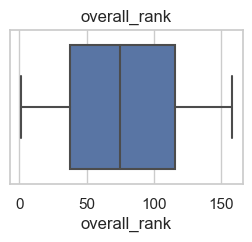

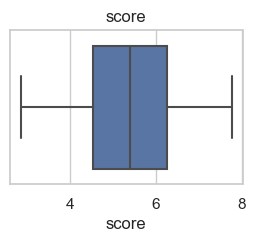

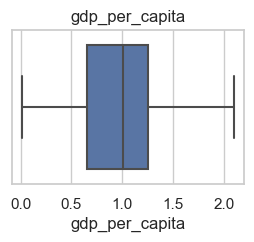

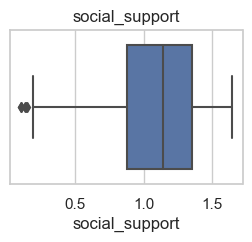

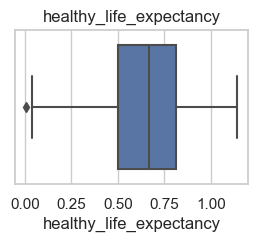

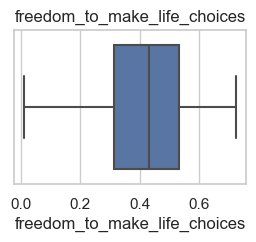

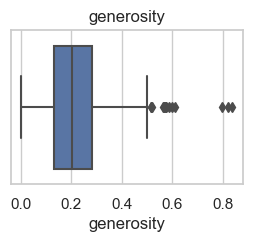

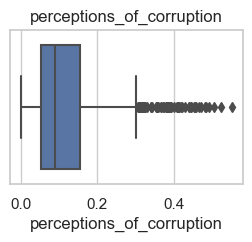

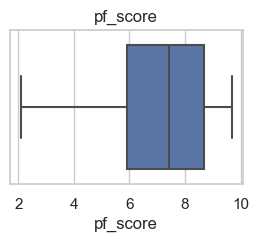

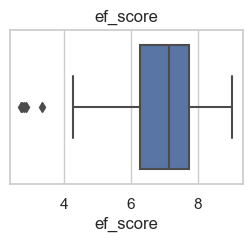

In [40]:
# Print boxplot

sns.set(style="whitegrid")

for i in df_whs_hfi_all[['overall_rank', 
                     'score', 
                     'gdp_per_capita',
                     'social_support', 
                     'healthy_life_expectancy',
                     'freedom_to_make_life_choices', 
                     'generosity',
                     'perceptions_of_corruption',
                        'pf_score',
                        'ef_score']].columns:
    plt.figure(figsize=(3,2))
    plt.title(i)
    sns.boxplot(data=df_whs_hfi_all,
                x=df_whs_hfi_all[i],
                orient='h')
    plt.show()

After a first cicle of outliers analysis we detected outliers in the variables below:

1. **Social support**;
2. **Generosity**;
3. **Healthy life expectancy**;
4. **Perception of corruption**;
5. **Economic freedom score**.

We will try to deal with the issue in the following way:

**Social support**: since the number isn't too large, we remove them through the calculation of the IQR <br>
**Generosity**: as _Social support_ <br> 
**Healthy life expectancy**: as _Social support_ and _Generosity_ <br>
**Perception of corruption**: due to the large amount of outliers I will try to apply the square root method <br>
**Economic freedom score**: as _Social support_, _Generosity_ and _Healthy life expectancy_ <br>

#### 'Social support' variable treatment

In [41]:
# IQR for social support

Q1_ss = df_whs_hfi_all['social_support'].quantile(0.25)
Q3_ss = df_whs_hfi_all['social_support'].quantile(0.75)
IQR_ss = Q3_ss - Q1_ss

lower_bound_ss = Q1_ss - 1.5 * IQR_ss
upper_bound_ss = Q3_ss + 1.5 * IQR_ss

df_whs_hfi_all['social_support_2'] = df_whs_hfi_all['social_support'][(df_whs_hfi_all['social_support'] >= lower_bound_ss) & (df_whs_hfi_all['social_support'] <= upper_bound_ss)]

In [42]:
# Data loss count

data_lost_ss = df_whs_hfi_all['social_support'].count() - df_whs_hfi_all['social_support_2'].count()
data_lost_ss

5

In [43]:
# Print social support

df_whs_hfi_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  735 non-null    int64  
 1   country                       735 non-null    object 
 2   score                         735 non-null    float64
 3   gdp_per_capita                734 non-null    float64
 4   social_support                734 non-null    float64
 5   healthy_life_expectancy       732 non-null    float64
 6   freedom_to_make_life_choices  733 non-null    float64
 7   generosity                    730 non-null    float64
 8   perceptions_of_corruption     728 non-null    float64
 9   year                          735 non-null    int64  
 10  pf_score                      703 non-null    float64
 11  ef_score                      703 non-null    float64
 12  social_support_2              729 non-null    float64
dtypes: fl

#### 'Generosity' variable treatment

In [44]:
# IQR for social support

Q1_g = df_whs_hfi_all['generosity'].quantile(0.25)
Q3_g = df_whs_hfi_all['generosity'].quantile(0.75)
IQR_g = Q3_g - Q1_g

lower_bound_g = Q1_g - 1.5 * IQR_g
upper_bound_g = Q3_g + 1.5 * IQR_g

df_whs_hfi_all['generosity_2'] = df_whs_hfi_all['generosity'][(df_whs_hfi_all['generosity'] >= lower_bound_g) & (df_whs_hfi_all['generosity'] <= upper_bound_g)]

In [45]:
# Data loss count

data_lost_g = df_whs_hfi_all['generosity'].count() - df_whs_hfi_all['generosity_2'].count()
data_lost_g

15

In [46]:
# Print generosity

df_whs_hfi_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  735 non-null    int64  
 1   country                       735 non-null    object 
 2   score                         735 non-null    float64
 3   gdp_per_capita                734 non-null    float64
 4   social_support                734 non-null    float64
 5   healthy_life_expectancy       732 non-null    float64
 6   freedom_to_make_life_choices  733 non-null    float64
 7   generosity                    730 non-null    float64
 8   perceptions_of_corruption     728 non-null    float64
 9   year                          735 non-null    int64  
 10  pf_score                      703 non-null    float64
 11  ef_score                      703 non-null    float64
 12  social_support_2              729 non-null    float64
 13  gener

#### 'Healthy life expectancy' variable treatment

In [47]:
# IQR for social support

Q1_hle = df_whs_hfi_all['healthy_life_expectancy'].quantile(0.25)
Q3_hle = df_whs_hfi_all['healthy_life_expectancy'].quantile(0.75)
IQR_hle = Q3_hle - Q1_hle

lower_bound_hle = Q1_hle - 1.5 * IQR_hle
upper_bound_hle = Q3_hle + 1.5 * IQR_hle

df_whs_hfi_all['healthy_life_expectancy_2'] = df_whs_hfi_all['healthy_life_expectancy'][(df_whs_hfi_all['healthy_life_expectancy'] >= lower_bound_hle) & (df_whs_hfi_all['healthy_life_expectancy'] <= upper_bound_hle)]

In [48]:
# Data loss count

data_lost_hle = df_whs_hfi_all['healthy_life_expectancy'].count() - df_whs_hfi_all['healthy_life_expectancy_2'].count()
data_lost_hle

1

In [49]:
# Print healthy life expectancy 

df_whs_hfi_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  735 non-null    int64  
 1   country                       735 non-null    object 
 2   score                         735 non-null    float64
 3   gdp_per_capita                734 non-null    float64
 4   social_support                734 non-null    float64
 5   healthy_life_expectancy       732 non-null    float64
 6   freedom_to_make_life_choices  733 non-null    float64
 7   generosity                    730 non-null    float64
 8   perceptions_of_corruption     728 non-null    float64
 9   year                          735 non-null    int64  
 10  pf_score                      703 non-null    float64
 11  ef_score                      703 non-null    float64
 12  social_support_2              729 non-null    float64
 13  gener

#### 'Perception of corruption' variable treatment

In [50]:
# Apply square root method to manager outliers

df_whs_hfi_all['perceptioncorruption_sqrt'] = np.sqrt(df_whs_hfi_all['perceptions_of_corruption'])

In [51]:
# Print perception of corruption

df_whs_hfi_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  735 non-null    int64  
 1   country                       735 non-null    object 
 2   score                         735 non-null    float64
 3   gdp_per_capita                734 non-null    float64
 4   social_support                734 non-null    float64
 5   healthy_life_expectancy       732 non-null    float64
 6   freedom_to_make_life_choices  733 non-null    float64
 7   generosity                    730 non-null    float64
 8   perceptions_of_corruption     728 non-null    float64
 9   year                          735 non-null    int64  
 10  pf_score                      703 non-null    float64
 11  ef_score                      703 non-null    float64
 12  social_support_2              729 non-null    float64
 13  gener

#### 'Ef score' variable treatment

In [52]:
# IQR for ef score

Q1_ef = df_whs_hfi_all['ef_score'].quantile(0.25)
Q3_ef = df_whs_hfi_all['ef_score'].quantile(0.75)
IQR_ef = Q3_ef - Q1_ef

lower_bound_ef = Q1_ef - 1.5 * IQR_ef
upper_bound_ef = Q3_ef + 1.5 * IQR_ef

df_whs_hfi_all['ef_score_2'] = df_whs_hfi_all['ef_score'][(df_whs_hfi_all['ef_score'] >= lower_bound_ef) & (df_whs_hfi_all['ef_score'] <= upper_bound_ef)]

In [53]:
# Data loss count

data_lost_ef = df_whs_hfi_all['ef_score'].count() - df_whs_hfi_all['ef_score_2'].count()
data_lost_ef

5

In [54]:
# Print ef score

df_whs_hfi_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  735 non-null    int64  
 1   country                       735 non-null    object 
 2   score                         735 non-null    float64
 3   gdp_per_capita                734 non-null    float64
 4   social_support                734 non-null    float64
 5   healthy_life_expectancy       732 non-null    float64
 6   freedom_to_make_life_choices  733 non-null    float64
 7   generosity                    730 non-null    float64
 8   perceptions_of_corruption     728 non-null    float64
 9   year                          735 non-null    int64  
 10  pf_score                      703 non-null    float64
 11  ef_score                      703 non-null    float64
 12  social_support_2              729 non-null    float64
 13  gener

### Counter checking outliers

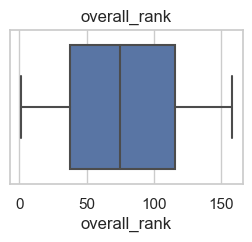

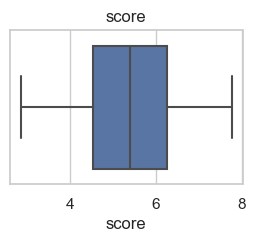

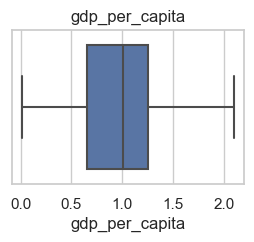

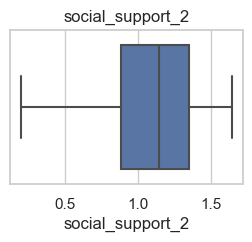

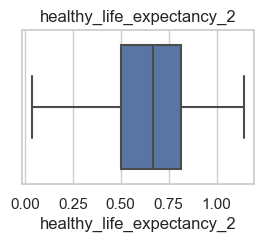

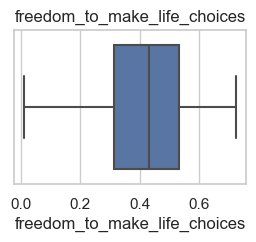

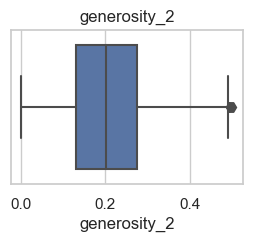

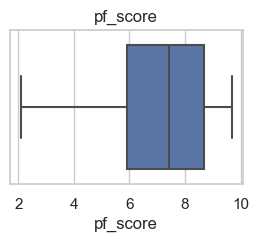

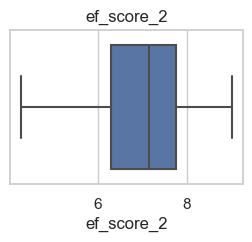

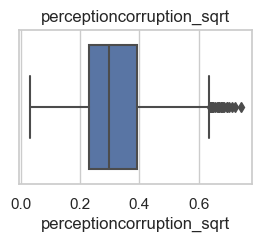

In [55]:
# Print boxplot

sns.set(style="whitegrid")

for i in df_whs_hfi_all[['overall_rank', 
                     'score', 
                     'gdp_per_capita',
                     'social_support_2', 
                     'healthy_life_expectancy_2',
                     'freedom_to_make_life_choices', 
                     'generosity_2',
                     'pf_score',
                     'ef_score_2',
                     'perceptioncorruption_sqrt']].columns:
    plt.figure(figsize=(3,2))
    plt.title(i)
    sns.boxplot(data=df_whs_hfi_all,
                x=df_whs_hfi_all[i],
                orient='h')
    plt.show()

After our threatment we have this scenario:

1. **Social support** has now no outliers;
2. **Generosity** sees its outliers reduced;
3. **Helthy life expectancy** has now no outliers;
4. **Economic freedom score** has now no outliers.

Unfortunately, perception of corruption mantains a large amount of outliers, that's why we decided to remove it from the analysis.

# **Data Exploration**

## Understanding data distribution

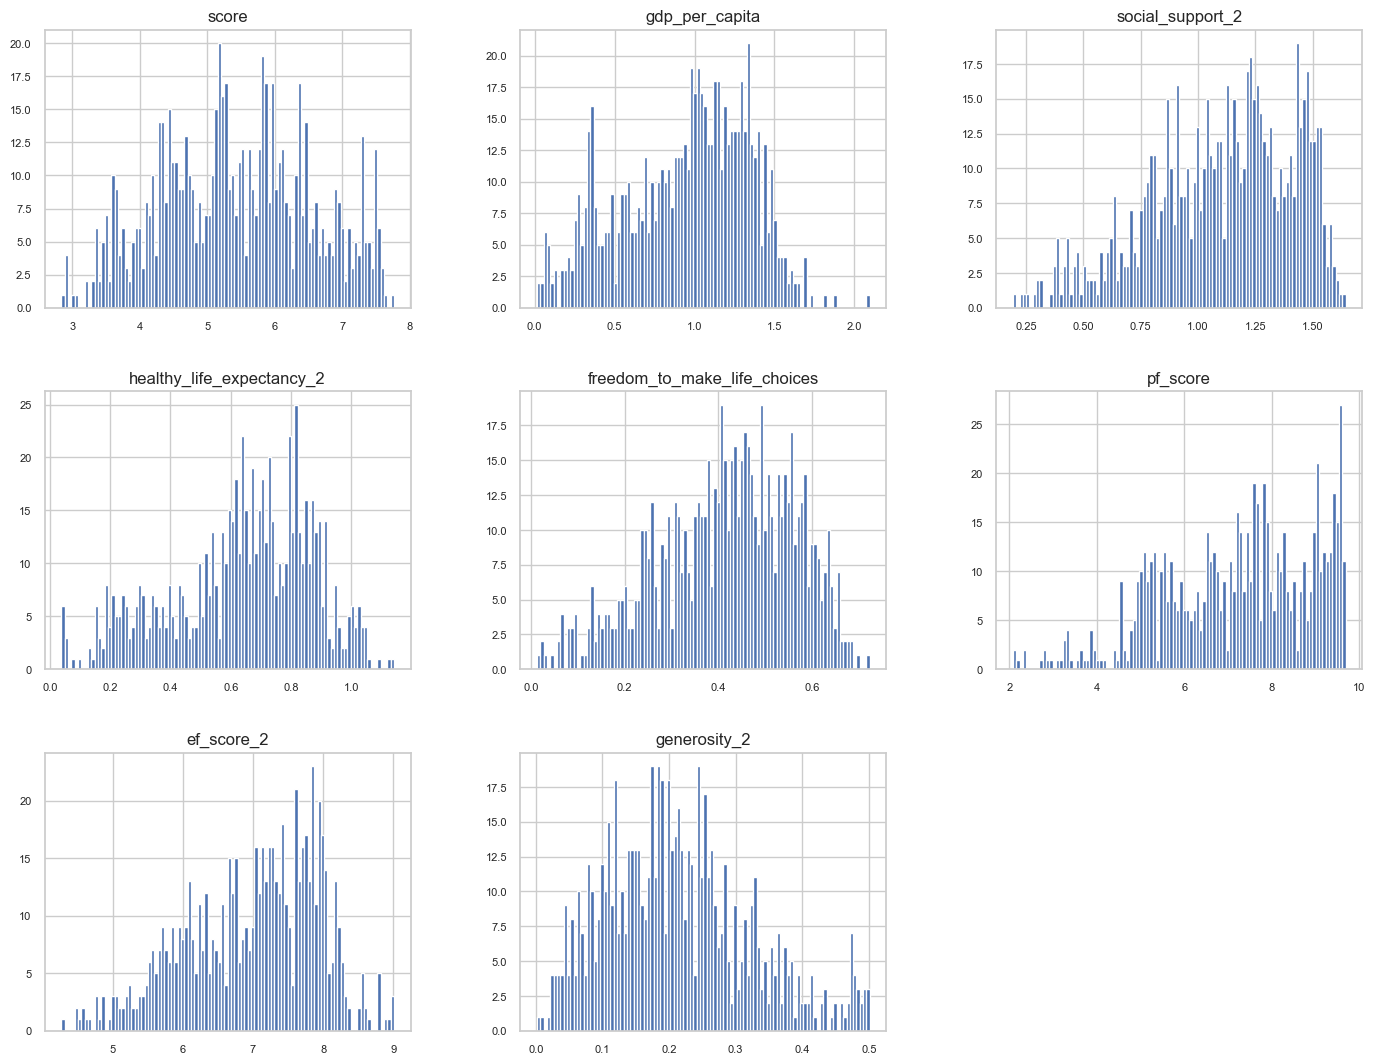

In [56]:
# Print histplot with every column

df_whs_hfi_all[[
           'score',
           'gdp_per_capita',
           'social_support_2',
           'healthy_life_expectancy_2',
           'freedom_to_make_life_choices',
            'pf_score',
            'ef_score_2',
           'generosity_2']].hist(figsize=(17, 13), bins=100, xlabelsize=8, ylabelsize=8)
plt.show()

In [57]:
# Skewness analysis

for i in df_whs_hfi_all[[
           'score',
           'gdp_per_capita',
           'social_support_2',
           'healthy_life_expectancy_2',
           'freedom_to_make_life_choices',
            'pf_score',
            'ef_score_2',
           'generosity_2']]:
    df_whr_hfi_all_skew = df_whs_hfi_all[i].dropna()
    skew_value = skew(df_whr_hfi_all_skew).round(2)

    if skew_value == 0:
        print(f"Skew value for {i} is {skew_value}: symmetrical distribution.")
    elif -1 < skew_value < 1:
        print(f"Skew value for {i} is {skew_value}: moderately asymmetrical distribution.")
    else:
        print(f"Skew value for {i} is {skew_value}: asymmetrical distribution.")

Skew value for score is 0.0: symmetrical distribution.
Skew value for gdp_per_capita is -0.34: moderately asymmetrical distribution.
Skew value for social_support_2 is -0.54: moderately asymmetrical distribution.
Skew value for healthy_life_expectancy_2 is -0.51: moderately asymmetrical distribution.
Skew value for freedom_to_make_life_choices is -0.43: moderately asymmetrical distribution.
Skew value for pf_score is -0.5: moderately asymmetrical distribution.
Skew value for ef_score_2 is -0.43: moderately asymmetrical distribution.
Skew value for generosity_2 is 0.55: moderately asymmetrical distribution.


The *Skewness* help us to understand if the data distribution discord from a normal distribution, the ideal condition to apply a multiple linear regression on our variables.

In our case the data distribution, although it is quite asymmetrical, presents a skew value between an interval of -1 and 1.
For this reason we can proceed with our analysis.

In [58]:
# Kurtosis analysis

for i in df_whs_hfi_all[[
           'score',
           'gdp_per_capita',
           'social_support_2',
           'healthy_life_expectancy_2',
           'freedom_to_make_life_choices',
            'pf_score',
            'ef_score_2',
           'generosity_2']]:
    df_whr_hfi_all_kurt = df_whs_hfi_all[i].dropna()
    kurt_value = kurtosis(df_whr_hfi_all_kurt, fisher=True).round(2)

    if kurt_value > 0.5:
        interpretation = "The distribution is leptokurtic with heavy tails."
    elif kurt_value < -0.5:
        interpretation = "The distribution is platykurtic with light tails."
    else:
        interpretation = "The distribution is mesokurtic, similar to a normal Gaussian distribution."

    print(f"Kurtosis value for {i}: {kurt_value}. {interpretation}")

Kurtosis value for score: -0.77. The distribution is platykurtic with light tails.
Kurtosis value for gdp_per_capita: -0.67. The distribution is platykurtic with light tails.
Kurtosis value for social_support_2: -0.37. The distribution is mesokurtic, similar to a normal Gaussian distribution.
Kurtosis value for healthy_life_expectancy_2: -0.42. The distribution is mesokurtic, similar to a normal Gaussian distribution.
Kurtosis value for freedom_to_make_life_choices: -0.44. The distribution is mesokurtic, similar to a normal Gaussian distribution.
Kurtosis value for pf_score: -0.42. The distribution is mesokurtic, similar to a normal Gaussian distribution.
Kurtosis value for ef_score_2: -0.46. The distribution is mesokurtic, similar to a normal Gaussian distribution.
Kurtosis value for generosity_2: -0.13. The distribution is mesokurtic, similar to a normal Gaussian distribution.


The *Kurtosis* index help us to understand how our distribution is similar to a Gaussian one testing its tails.

In our case, despite we don't have a perfect Gaussian distribution our values don't discord as much from the ideal distribution, that's why we can proceed with our analysis.

## Understanding data correlation

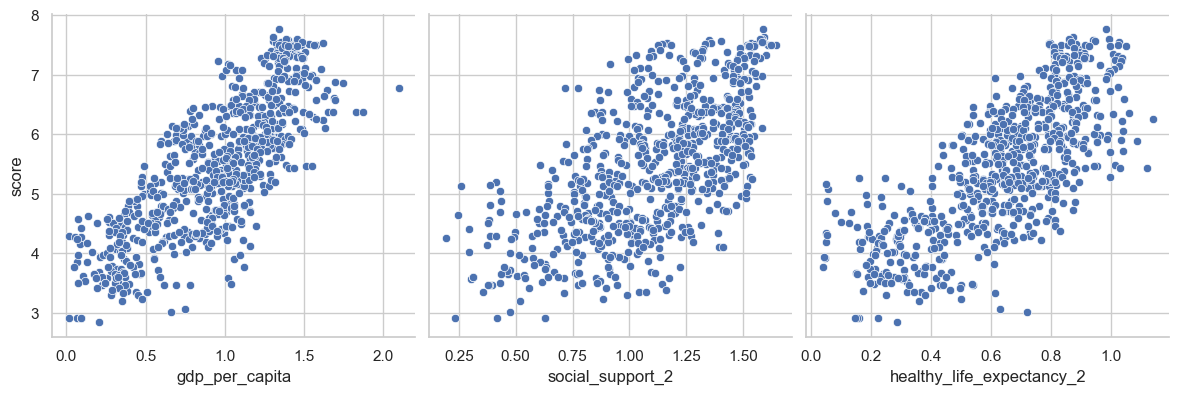

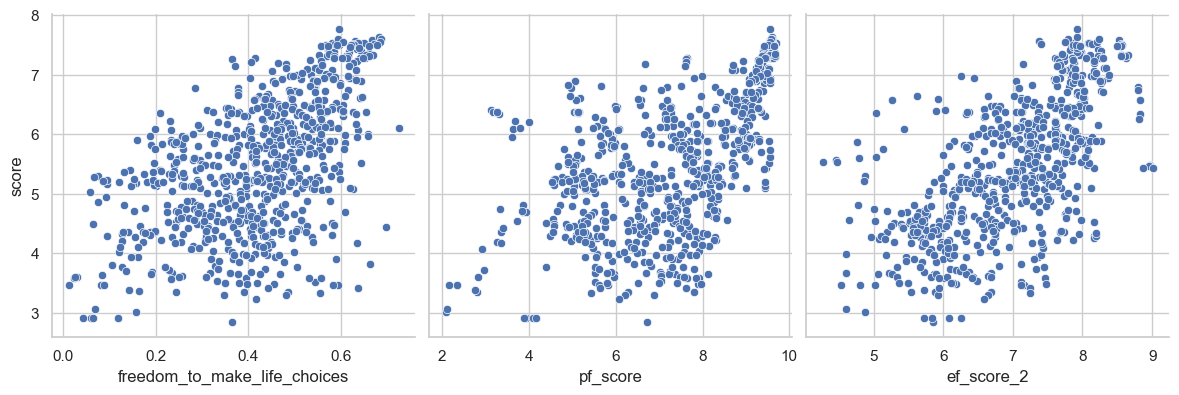

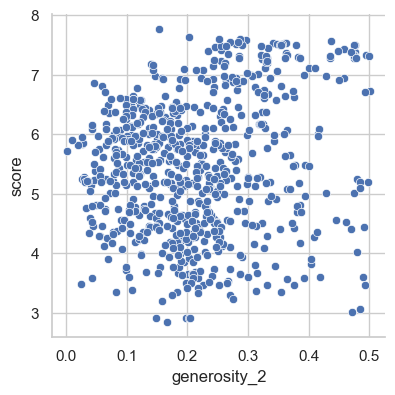

In [59]:
# Print scatterplot with every combination of score + other variables 

for i in range(0, len(df_whs_hfi_all[[
                                        'gdp_per_capita',
                                        'social_support_2',
                                        'healthy_life_expectancy_2',
                                        'freedom_to_make_life_choices',
                                        'pf_score',
                                        'ef_score_2',
                                        'generosity_2']].columns), 3):
    sns.pairplot(data=df_whs_hfi_all[[
                                        'score',
                                        'gdp_per_capita',
                                        'social_support_2',
                                        'healthy_life_expectancy_2',
                                        'freedom_to_make_life_choices',
                                        'pf_score',
                                        'ef_score_2',
                                        'generosity_2']],
                x_vars=df_whs_hfi_all[[
                                        'gdp_per_capita',
                                        'social_support_2',
                                        'healthy_life_expectancy_2',
                                        'freedom_to_make_life_choices',
                                        'pf_score',
                                        'ef_score_2',
                                        'generosity_2']].columns[i:i+3],
                y_vars=['score'],
                height=4)
    plt.show()

After the data correlation analysis we can say that:

1. **GDP per capita** and **Healthy life expectancy** seem to be the most correlated variables <br>
2. **Freedom to make life choices**, **Personal freedom** and **Economic freedom** seem to be quite correlated (probably they are correlated each other) <br>
3. **Generosity** seem to be not correlated to happiness score.

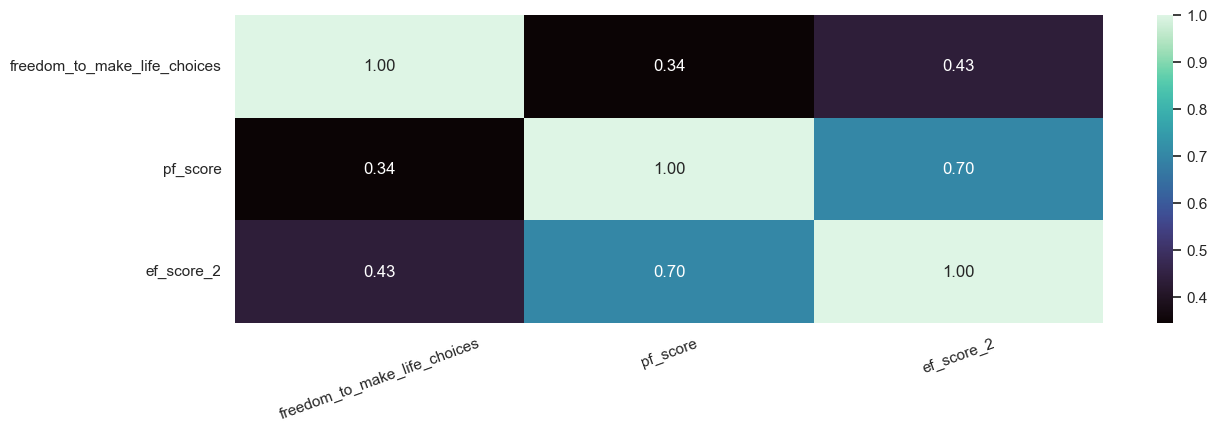

In [60]:
# Print correlation matrix between the 3 freedom variables

plt.figure(figsize=(14, 4))

corr_matrix_freedom = df_whs_hfi_all[[
                         'freedom_to_make_life_choices', 
                            'pf_score',
                            'ef_score_2',]].corr()

ax = sns.heatmap(data=corr_matrix_freedom, cmap='mako', annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

The 3 freedom variables are correlated each other.
**Personal freedom score** and **Economic freedom score** are the most correlated.

## Year trendline

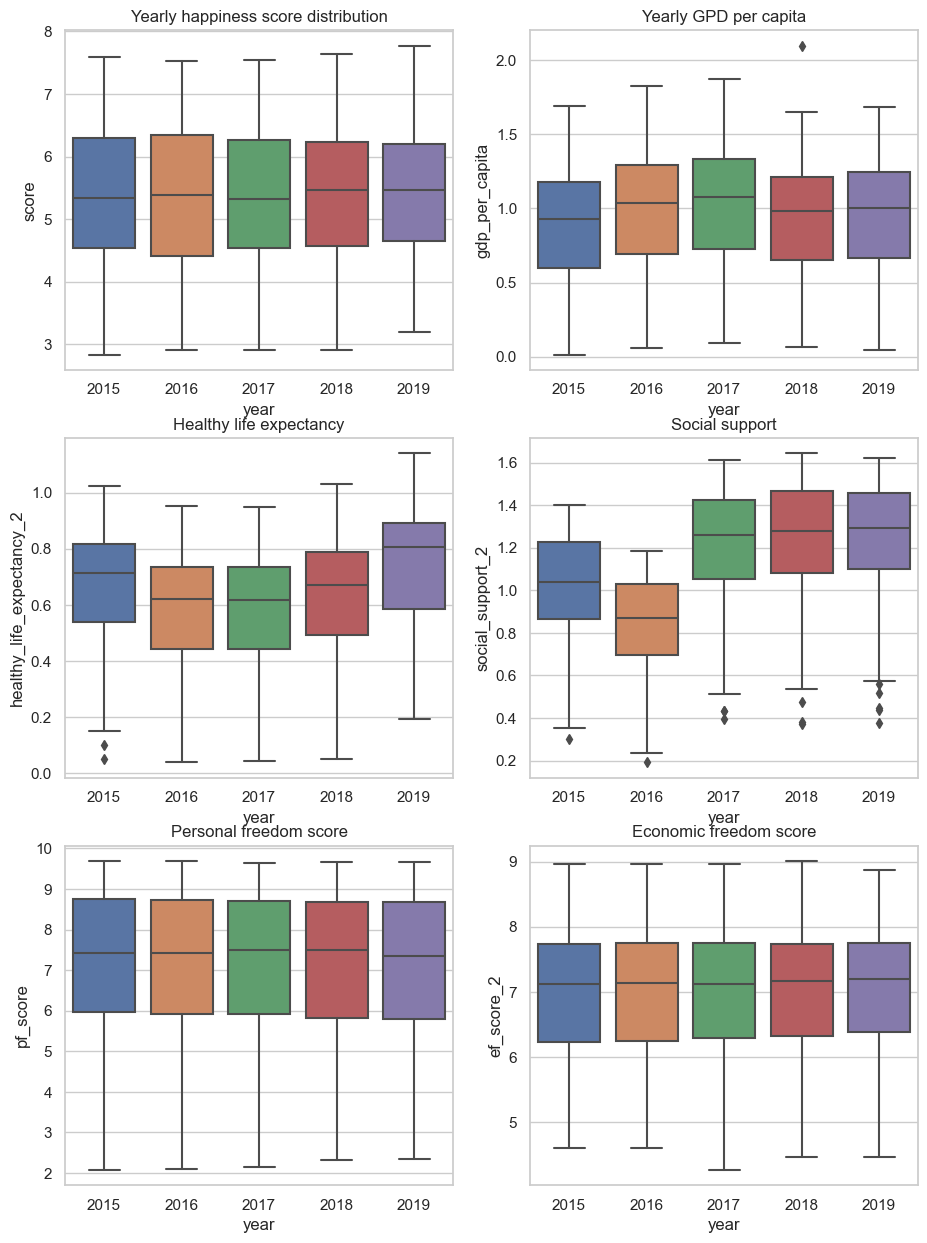

In [61]:
# Happiness score & GDP per capita distribution per year

fig, axes = plt.subplots(3, 2, figsize=(11, 15))

sns.boxplot(ax=axes[0,0], x='year', y='score', data=df_whs_hfi_all)
axes[0,0].set_title('Yearly happiness score distribution')

sns.boxplot(ax=axes[0,1], x='year', y='gdp_per_capita', data=df_whs_hfi_all)
axes[0,1].set_title('Yearly GPD per capita')

sns.boxplot(ax=axes[1,0], x='year', y='healthy_life_expectancy_2', data=df_whs_hfi_all)
axes[1,0].set_title('Healthy life expectancy')

sns.boxplot(ax=axes[1,1], x='year', y='social_support_2', data=df_whs_hfi_all)
axes[1,1].set_title('Social support')

sns.boxplot(ax=axes[2,0], x='year', y='pf_score', data=df_whs_hfi_all)
axes[2,0].set_title('Personal freedom score')

sns.boxplot(ax=axes[2,1], x='year', y='ef_score_2', data=df_whs_hfi_all)
axes[2,1].set_title('Economic freedom score')

plt.show()

Overall, the **Happiness score index** is growing through years and the related IQR is decreasing year over year. Probably the world tendencies are slowly become similar.

### Happiness score: top 5

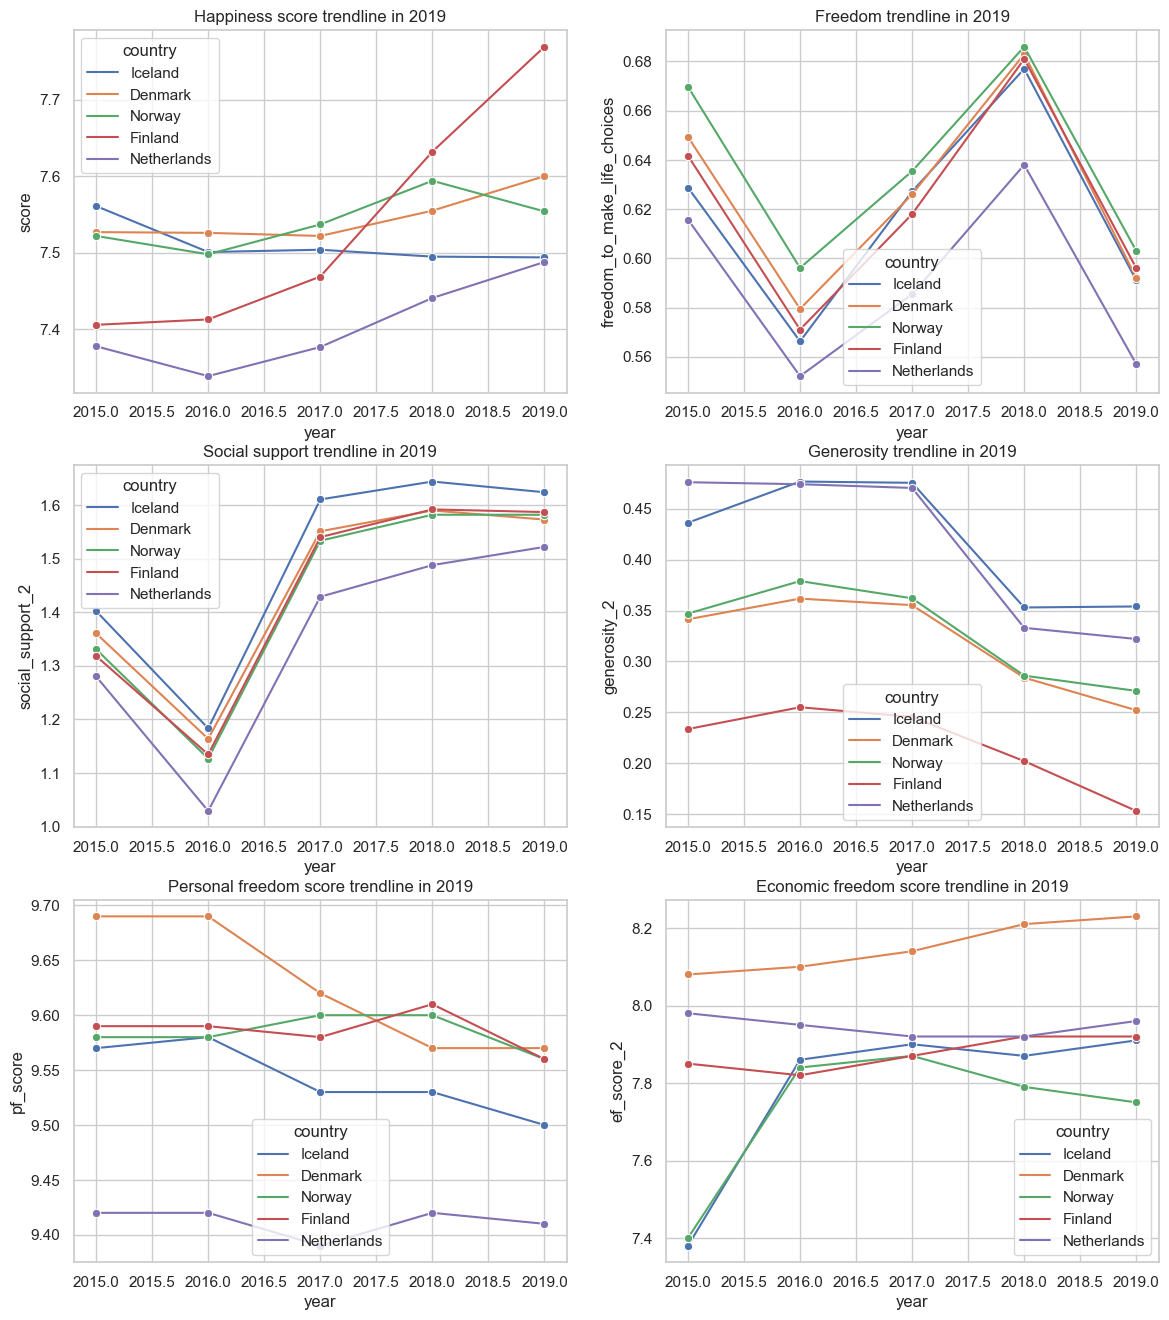

In [62]:
# Happiness score distribution per year

fig_2, axes_2 = plt.subplots(3, 2, figsize=(14, 16))

df_whr_all_t5 = df_whs_hfi_all[df_whs_hfi_all['year'] == 2019].nlargest(5, 'score')['country']

sns.lineplot(ax=axes_2[0, 0], x='year', y='score', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_t5)], marker='o')
axes_2[0, 0].set_title('Happiness score trendline in 2019')

sns.lineplot(ax=axes_2[0, 1], x='year', y='freedom_to_make_life_choices', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_t5)], marker='o')
axes_2[0, 1].set_title('Freedom trendline in 2019')

sns.lineplot(ax=axes_2[1, 0], x='year', y='social_support_2', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_t5)], marker='o')
axes_2[1, 0].set_title('Social support trendline in 2019')

sns.lineplot(ax=axes_2[1, 1], x='year', y='generosity_2', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_t5)], marker='o')
axes_2[1, 1].set_title('Generosity trendline in 2019')

sns.lineplot(ax=axes_2[2, 0], x='year', y='pf_score', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_t5)], marker='o')
axes_2[2, 0].set_title('Personal freedom score trendline in 2019')

sns.lineplot(ax=axes_2[2, 1], x='year', y='ef_score_2', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_t5)], marker='o')
axes_2[2, 1].set_title('Economic freedom score trendline in 2019')

plt.show()

Observing the top 5 trendline we can say:

1. **Finland** grows a lot in terms of happiness score index in the last year passing from 4th to 1st rank, also Netherlands had a good growth;
2. In terms of **generosity** all involved nations seem to have a decreasing trendline;
3. After a drop, the **social support** are going to stabilize;
4. The **freedom of make life choices** is quite unstable while **personal freedom** is decreasing. The **economic freedom** trendline differs between top 5 nations.

### Happiness score: worst 5

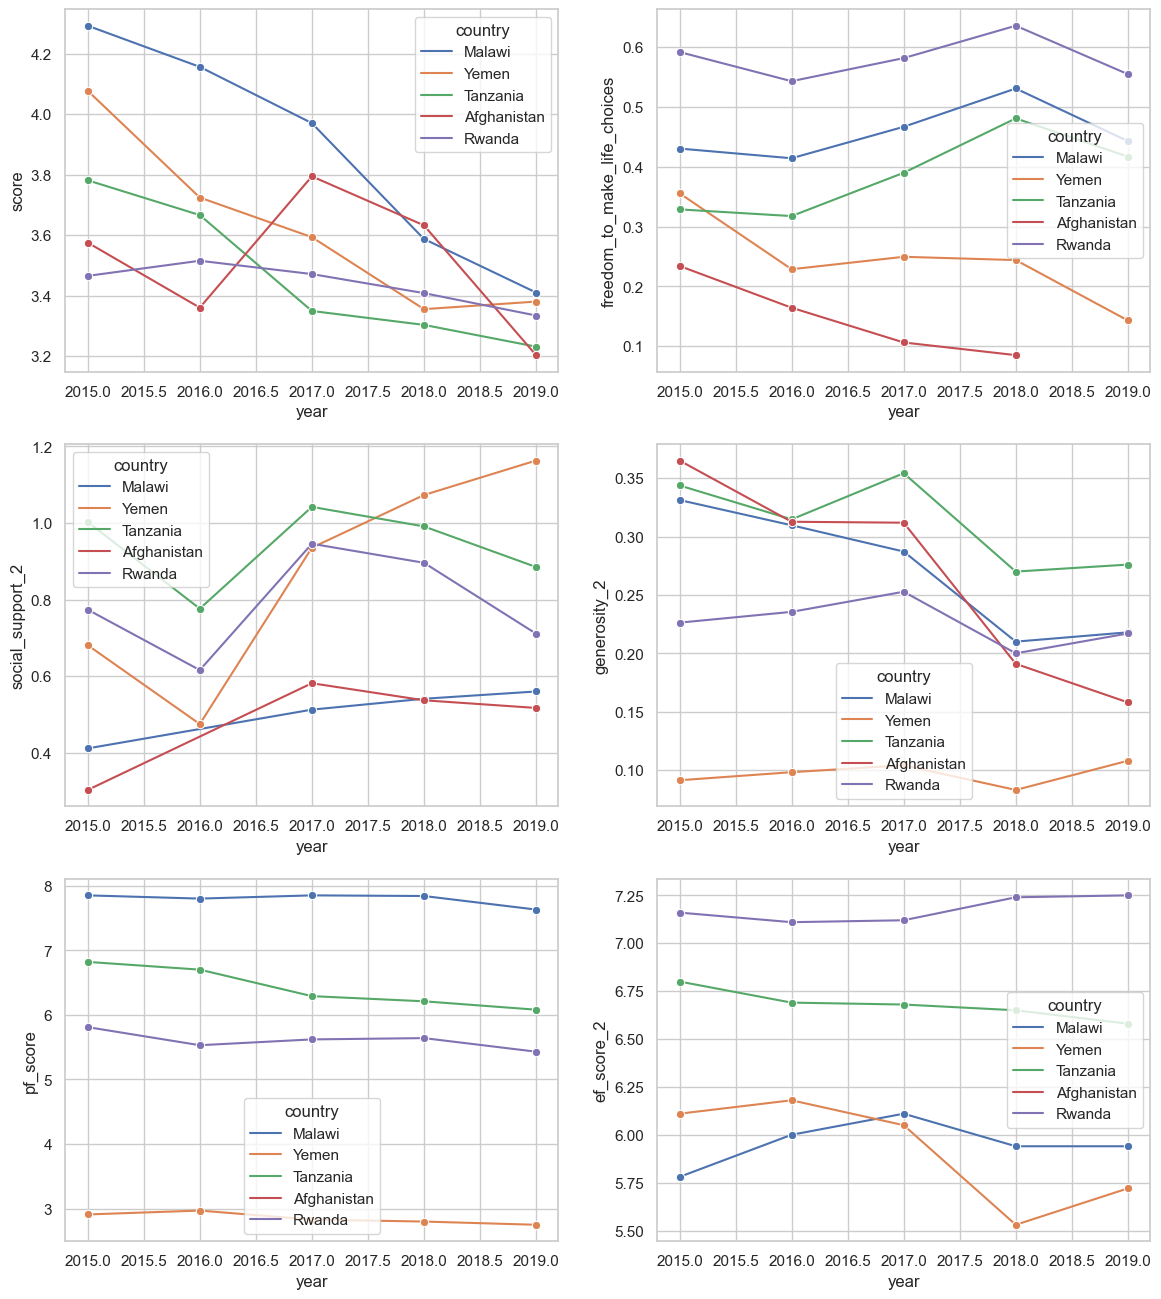

In [63]:
# Happiness score distribution per year

fig_3, axes_3 = plt.subplots(3, 2, figsize=(14, 16))

df_whr_all_l5 = df_whs_hfi_all[df_whs_hfi_all['year'] == 2019].nsmallest(5, 'score')['country']

sns.lineplot(ax=axes_3[0, 0], x='year', y='score', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_l5)], marker='o')
axes_2[0, 0].set_title('Happiness score trendline in 2019')

sns.lineplot(ax=axes_3[0, 1], x='year', y='freedom_to_make_life_choices', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_l5)], marker='o')
axes_2[0, 1].set_title('Freedom trendline in 2019')

sns.lineplot(ax=axes_3[1, 0], x='year', y='social_support_2', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_l5)], marker='o')
axes_2[1, 0].set_title('Social support trendline in 2019')

sns.lineplot(ax=axes_3[1, 1], x='year', y='generosity_2', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_l5)], marker='o')
axes_2[1, 1].set_title('Generosity trendline in 2019')

sns.lineplot(ax=axes_3[2, 0], x='year', y='pf_score', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_l5)], marker='o')
axes_2[2, 0].set_title('Personal freedom score trendline in 2019')

sns.lineplot(ax=axes_3[2, 1], x='year', y='ef_score_2', hue='country', data=df_whs_hfi_all[df_whs_hfi_all['country'].isin(df_whr_all_l5)], marker='o')
axes_2[2, 1].set_title('Economic freedom score trendline in 2019')

plt.show()

The worst 5 nations in the ranking sees its score decreasing year over year.
**Syria** is the only nation with a positive trend although has the worst performances in the other indeces.

# **Data Trasformation**

In order to understand how socio-economic factors interact with happiness score we decided to train a multiple linear regression.
Below the theoric model. <br>

Dipendent variables: <br>

1. **GDP per capita**;
2. **Social support**;
3. **Healthy life expectancy**;
4. **Freedom to make life choices**;
5. **Generosity**;
6. **Personal freedom score**;
7. **Economic freedom score**

Indipendent variable: <br>

1. **Happiness score**

## Theoric model

In [64]:
# Model 1
# Multiple linear regression preparation

df_whs_hfi_all = df_whs_hfi_all.dropna()

X = df_whs_hfi_all[['gdp_per_capita',
                'social_support_2', 
                'healthy_life_expectancy_2',
                'freedom_to_make_life_choices', 
                'generosity_2',
                'pf_score',
                'ef_score_2']]

y = df_whs_hfi_all['score']

X = sm.add_constant(X)

regr_model_1 = sm.OLS(y, X).fit()

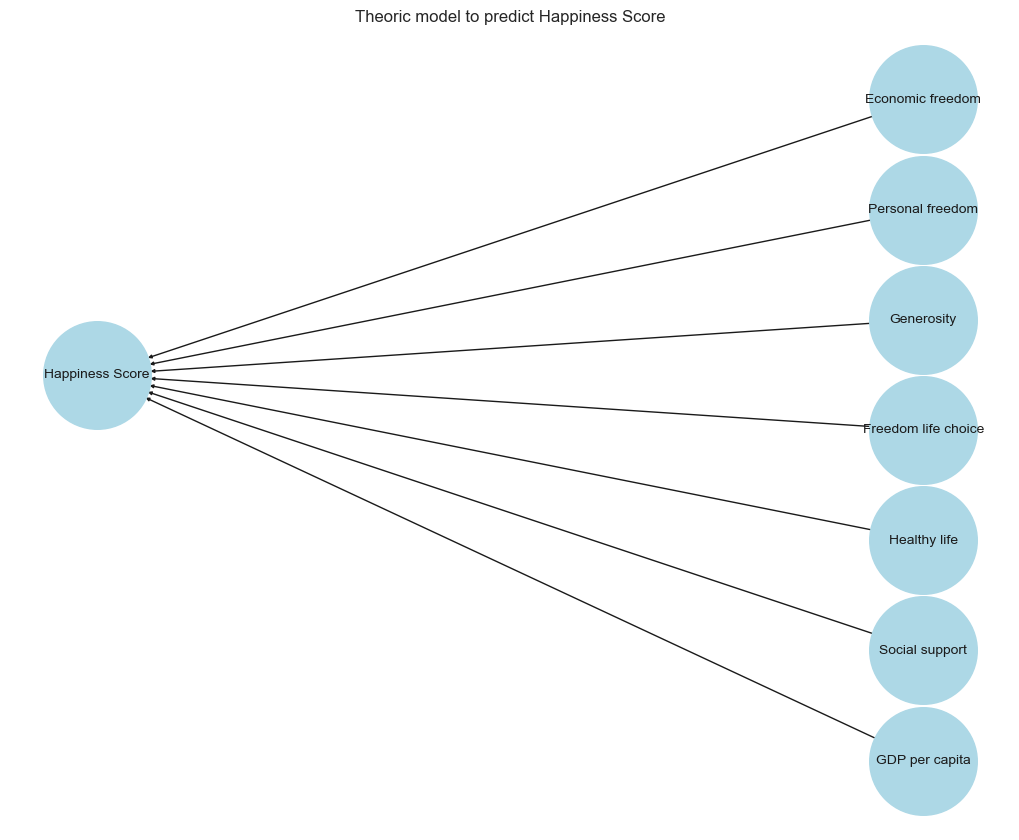

In [65]:
# Create a directed graph
graph = nx.DiGraph()

# Define nodes

dependent_variables = ['GDP per capita',
                'Social support', 
                'Healthy life',
                'Freedom life choice', 
                'Generosity',
                'Personal freedom',
                'Economic freedom']

independent_variables = 'Happiness Score'

# Add nodes to the graph
for var in dependent_variables:
    graph.add_node(var, pos=(0, dependent_variables.index(var)))

graph.add_node(independent_variables, pos=(1, len(dependent_variables) / 2))

# Add edges to the graph
for var in dependent_variables:
    graph.add_edge(var, independent_variables)

# Define positions
pos = {node: (2, idx) for idx, node in enumerate(dependent_variables)}
pos[independent_variables] = (1, len(dependent_variables) / 2)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, with_labels=True, node_size=6000, node_color='lightblue', font_size=10, font_weight='light', arrowsize=5)
plt.title("Theoric model to predict Happiness Score")
plt.show()

# **Data Visualization**

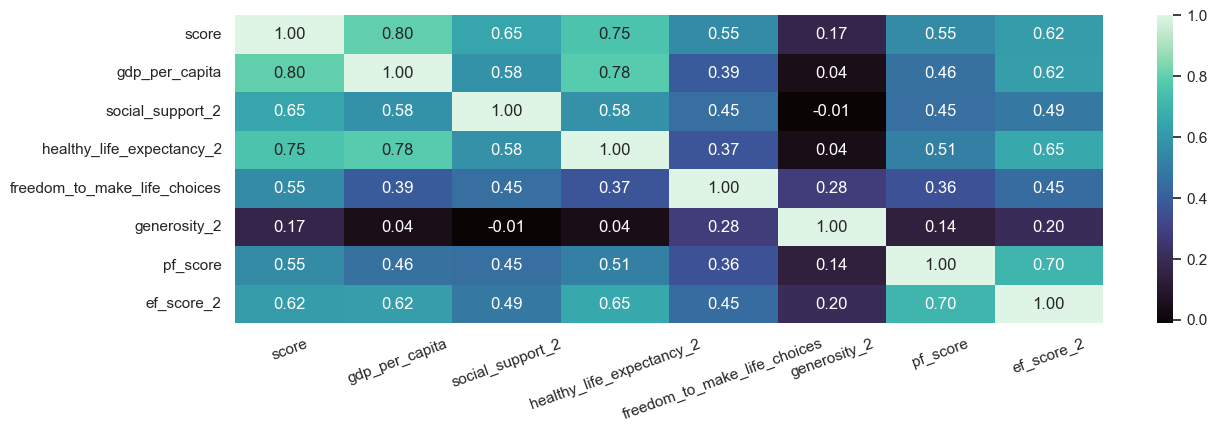

In [66]:
# Print correlation matrix

plt.figure(figsize=(14, 4))

corr_matrix = df_whs_hfi_all[['score', 
                         'gdp_per_capita',
                         'social_support_2', 
                         'healthy_life_expectancy_2',
                         'freedom_to_make_life_choices', 
                         'generosity_2',
                            'pf_score',
                            'ef_score_2',]].corr()

ax = sns.heatmap(data=corr_matrix, cmap='mako', annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

The correlation matrix shows a multicollinearity between most of the variables, in the specific we can see:

1. The only variable with a different trend is **Generosity**. **Generosity** doesn't correlate with other variables in the model;
2. **GDP per capita** and **Healthy life expectancy** confirm their correlation with **Happiness score**.
3. **Freedom to make life choices** doesn't have a strong correlation with the model's variables.

In [67]:
# Print the regression model

regr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          2.45e-205
Time:                        16:38:36   Log-Likelihood:                -531.70
No. Observations:                 662   AIC:                             1079.
Df Residuals:                     654   BIC:                             1115.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.1349      0.178     11.974      0.000       1.785       2.485
gdp_per_capita                   1.2586      0.090     14.030      0.000       1.082       1.435
social_support_2                 0.5531      0.091      6.064      0.000       0.374       0.732
healthy_life_expectancy_2        1.0989      0.157      6.986      0.000       0.790       1.408
freedom_to_make_life_choices     1.5168      0.182      8.323      0.000       1.159       1.875
generosity_2                     0.8947      0.207      4.320      0.000       0.488       1.301
pf_score                         0.0922      0.018      5.229      0.000       0.058       0.127
ef_score_2                      -0.0974      0.038     -2.567      0.010      -0.172      -0.023
==============================================================================
Omnibus:                       10.694   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.147
Skew:                          -0.264   Prob(JB):                      0.00380
Kurtosis:                       3.354   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions

**R-squared** and **Adj. R-squared** suggest us a good capability of the model to predict the **happiness score variable**, in fact 0.772 (0.770) means the variance explained by the model.

**F-statistic** is highly significant, indicating that the model is a good fit for the data.

Every variable in the model is highly significant, in the specific **GDP per capita** has the best power to predict the increase of **happiness score**.
**Economic freedom score** has a negative effect, this means that at growing of **economic freedom score** the **happiness score** decrease.

Unfortunately, the additional metrics suggest us:

1. As we see during the distribution analysis, the data deviation from normality seem to have an important impact (Omnibus: 10.694);
2. As we see with the correlation matrix, there is multicollinearity (Condition number: 110);
3. There are a lot of issues in the residuals (Jarque-Bera: 11.147).

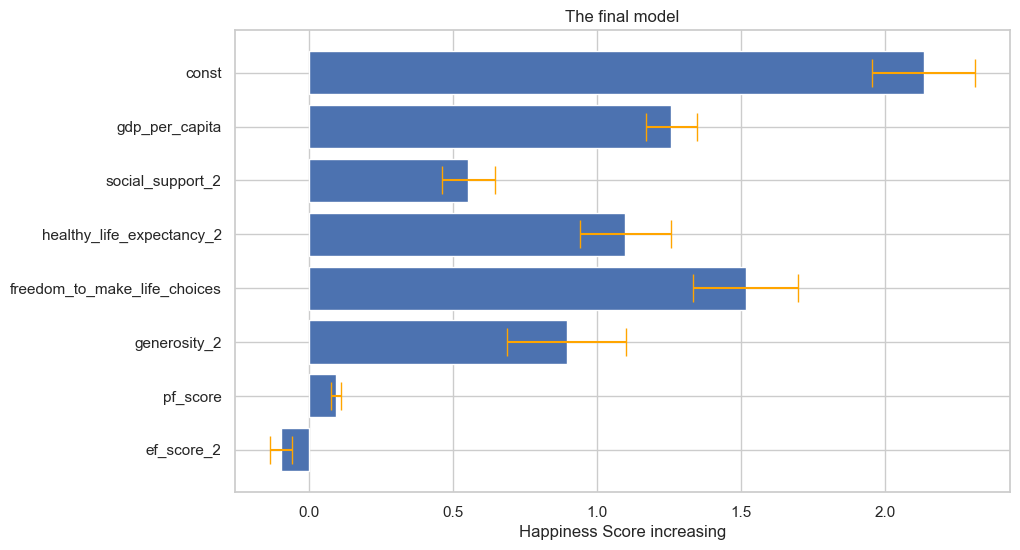

In [68]:
# Graph

coefficients = regr_model_1.params
errors = regr_model_1.bse

variables = coefficients.index

# Create the plot

fig, ax = plt.subplots(figsize=(10, 6))
position_y = np.arange(len(variables))

ax.barh(position_y, coefficients, xerr=errors, align='center', ecolor='orange', capsize=10)
ax.set_yticks(position_y)
ax.set_yticklabels(variables)
ax.invert_yaxis() 
ax.set_xlabel('Happiness Score increasing')
ax.set_title('The final model')

plt.show()

## Appendix

### World Happiness Score Ranking 2019

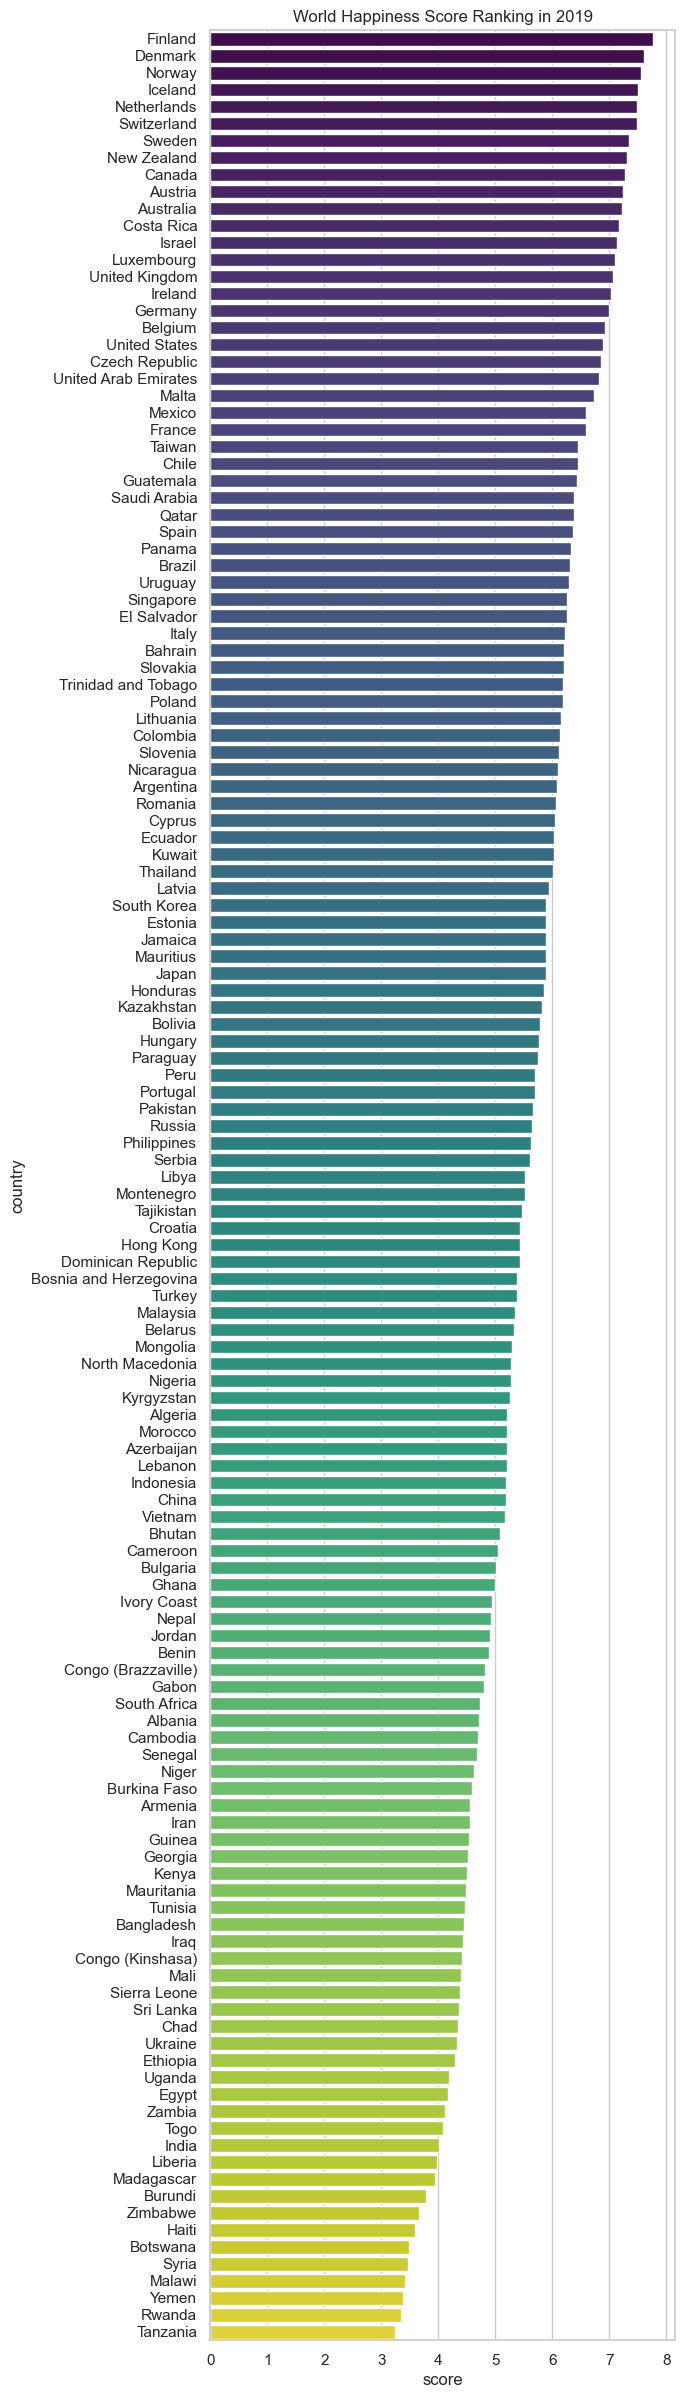

In [69]:
# Create 2019 ranking

whs_ranking_2019 = df_whs_hfi_all[df_whs_hfi_all['year'] == 2019]

# Print the plot

plt.figure(figsize=(6,30))

sns.barplot(
    data=whs_ranking_2019,
    x='score',
    y='country',
    orient='h',
    palette='viridis'
)

plt.title('World Happiness Score Ranking in 2019')

plt.show()

### Best performing countries between 2015 and 2019 in WHS

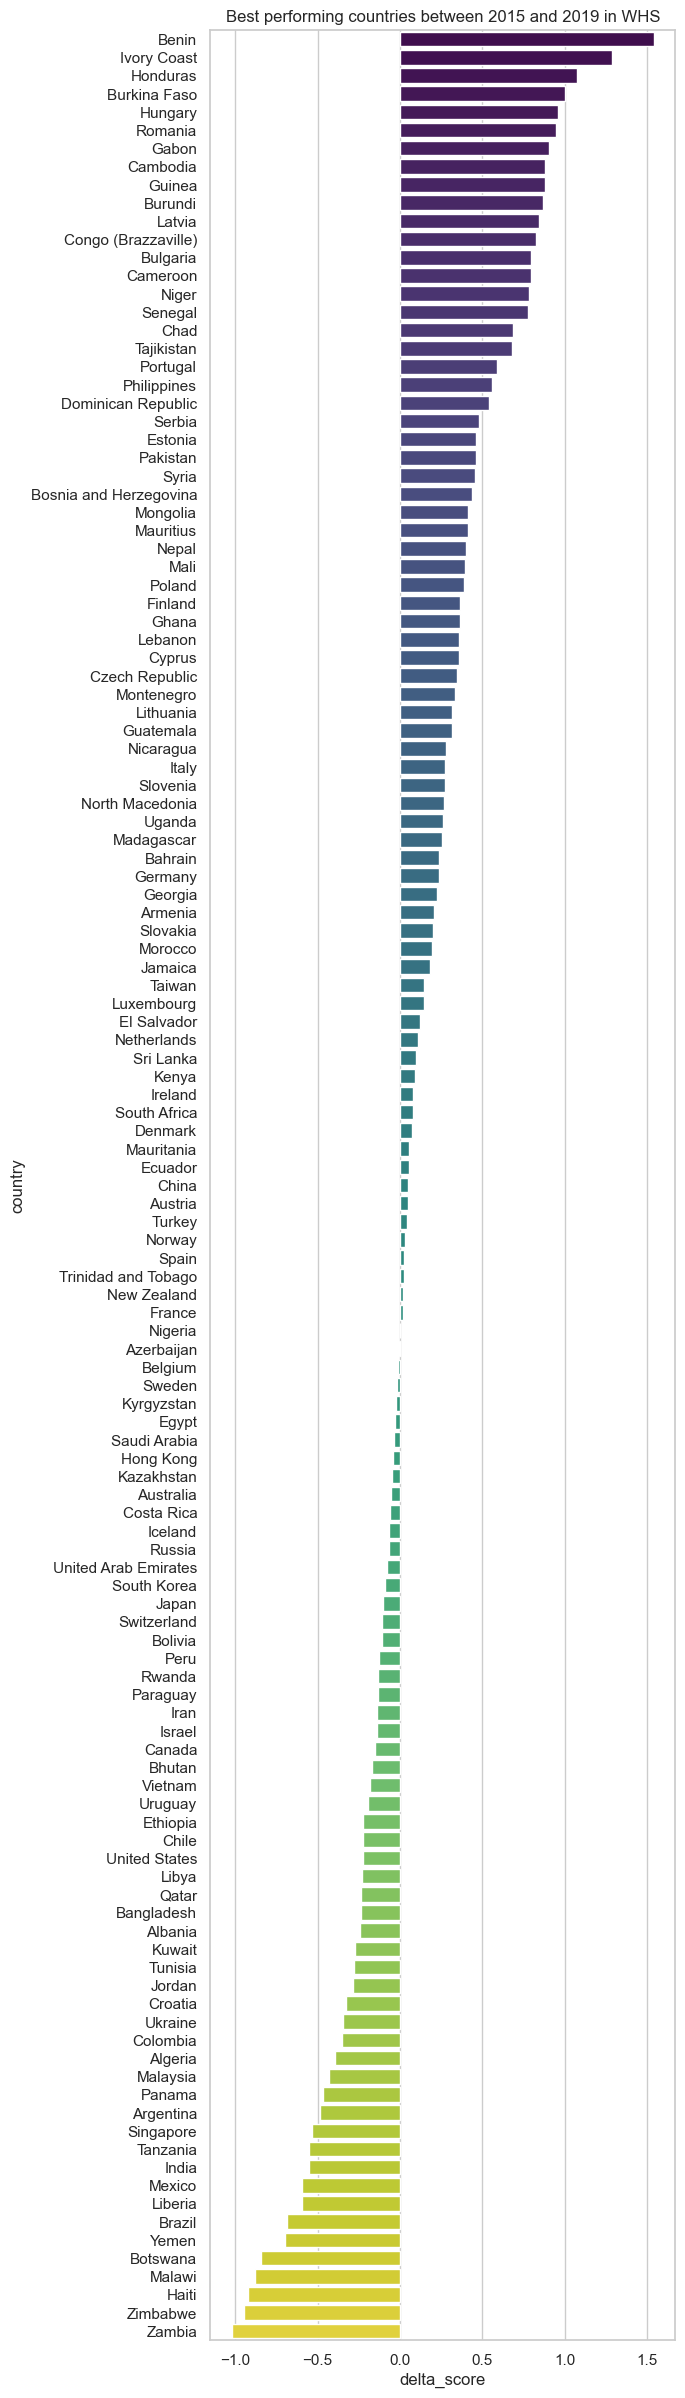

In [70]:
# Create best performing country for ranking

df_whs_hfi_delta = df_whs_hfi_all[['country','score','year']].copy()

df_whs_hfi_2019 = df_whs_hfi_delta[['country','score','year']][df_whs_hfi_delta['year'] == 2019]
df_whs_hfi_2015 = df_whs_hfi_delta[['country','score','year']][df_whs_hfi_delta['year'] == 2015]

df_whs_hfi_2019 = df_whs_hfi_2019.rename(columns={'score':'score_2019'})
df_whs_hfi_2015 = df_whs_hfi_2015.rename(columns={'score':'score_2015'})

df_whs_hfi_2019delta2015 = df_whs_hfi_2019.merge(df_whs_hfi_2015, on='country', how='left')

df_whs_hfi_2019delta2015 = df_whs_hfi_2019delta2015.dropna()

df_whs_hfi_2019delta2015['delta_score'] = (df_whs_hfi_2019delta2015['score_2019'] - df_whs_hfi_2019delta2015['score_2015'])

# Print the plot

plt.figure(figsize=(6,30))

sns.barplot(
    data=df_whs_hfi_2019delta2015.sort_values('delta_score', ascending=False),
    x='delta_score',
    y='country',
    orient='h',
    palette='viridis'
)

plt.title('Best performing countries between 2015 and 2019 in WHS')

plt.show()

### Geomap of World Happiness Score in 2019

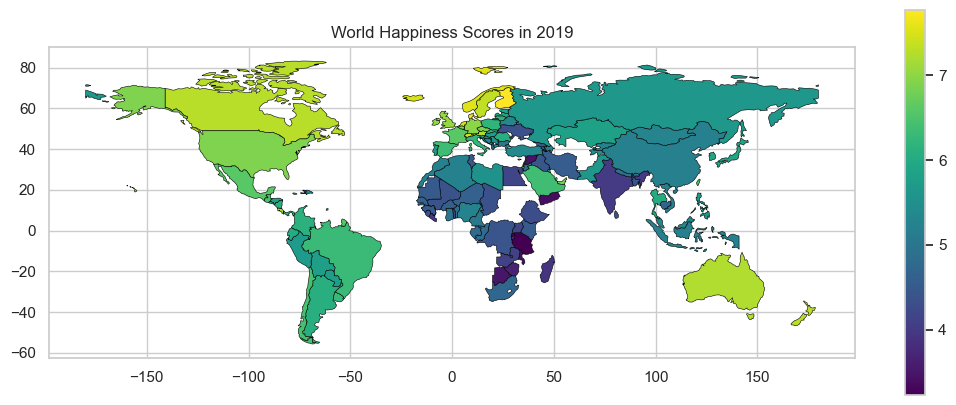

In [71]:
# Geomap of World Happiness Score in 2019

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Standardize dataset data

df_whs_hfi_all.loc[df_whs_hfi_all['country'] == 'United States', 'country' ] = 'United States of America'
df_whs_hfi_all.loc[df_whs_hfi_all['country'] == 'Bosnia and Herzegovina', 'country' ] = 'Bosnia and Herz.'
df_whs_hfi_all.loc[df_whs_hfi_all['country'] == 'Congo (Brazzaville)', 'country' ] = 'Congo'
df_whs_hfi_all.loc[df_whs_hfi_all['country'] == 'Congo (Kinshasa)', 'country' ] = 'Dem. Rep. Congo'
df_whs_hfi_all.loc[df_whs_hfi_all['country'] == 'Czech Republic', 'country' ] = 'Czechia'
df_whs_hfi_all.loc[df_whs_hfi_all['country'] == 'Dominican Republic', 'country' ] = 'Dominican Rep.'

# Unire il dataset con i punteggi di felicità del 2019

world = world.merge(df_whs_hfi_all[df_whs_hfi_all['year'] == 2019][['country', 'score']], left_on='name', right_on='country', how='left')

# Creare una mappa geografica

world.plot(column='score', legend=True, figsize=(13, 5), edgecolor='black', linewidth=0.4, cmap='viridis')
plt.title('World Happiness Scores in 2019')
plt.show()

### Rejected models

In [72]:
# Model 2 (standardizing data)
# Standardizing the model variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a costant

X_scaled = sm.add_constant(X_scaled)

regr_model_2 = sm.OLS(y, X_scaled).fit()

In [73]:
# Print the regression model

regr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          2.45e-205
Time:                        16:38:37   Log-Likelihood:                -531.70
No. Observations:                 662   AIC:                             1079.
Df Residuals:                     654   BIC:                             1115.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4588      0.021    258.409      0.000       5.417       5.500
x1         -1.059e-16   2.17e-17     -4.883      0.000   -1.48e-16   -6.33e-17
x2             0.5018      0.036     14.030      0.000       0.432       0.572
x3             0.1734      0.029      6.064      0.000       0.117       0.230
x4             0.2575      0.037      6.986      0.000       0.185       0.330
x5             0.2142      0.026      8.323      0.000       0.164       0.265
x6             0.0979      0.023      4.320      0.000       0.053       0.142
x7             0.1576      0.030      5.229      0.000       0.098       0.217
x8            -0.0911      0.035     -2.567      0.010      -0.161      -0.021
==============================================================================
Omnibus:                       10.694   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.147
Skew:                          -0.264   Prob(JB):                      0.00380
Kurtosis:                       3.354   Cond. No.                     1.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# Model 3
# Applying logaritmic trasformation

df_whs_hfi_log = df_whs_hfi_all.copy()

df_whs_hfi_log['log_gdp_per_capita'] = np.log(df_whs_hfi_log['gdp_per_capita'] + 1)
df_whs_hfi_log['social_support_2'] = np.log(df_whs_hfi_log['social_support_2'] + 1)
df_whs_hfi_log['healthy_life_expectancy_2'] = np.log(df_whs_hfi_log['healthy_life_expectancy_2'] + 1)
df_whs_hfi_log['freedom_to_make_life_choices'] = np.log(df_whs_hfi_log['freedom_to_make_life_choices'] + 1)
df_whs_hfi_log['generosity_2'] = np.log(df_whs_hfi_log['generosity_2'] + 1)
df_whs_hfi_log['pf_score'] = np.log(df_whs_hfi_log['pf_score'] + 1)
df_whs_hfi_log['ef_score_2'] = np.log(df_whs_hfi_log['ef_score_2'] + 1)
df_whs_hfi_log['score'] = np.log(df_whs_hfi_log['score'] + 1)

X_3 = df_whs_hfi_log[['gdp_per_capita',
                'social_support_2', 
                'healthy_life_expectancy_2',
                'freedom_to_make_life_choices', 
                'generosity_2',
                'pf_score',
                'ef_score_2']]

y_3 = df_whs_hfi_log['score']

X_3 = sm.add_constant(X_3)

regr_model_3 = sm.OLS(y_3, X_3).fit()

In [75]:
# Print the regression model

regr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     311.2
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          2.09e-203
Time:                        16:38:37   Log-Likelihood:                 680.80
No. Observations:                 662   AIC:                            -1346.
Df Residuals:                     654   BIC:                            -1310.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.2577      0.070     17.971      0.000       1.120       1.395
gdp_per_capita                   0.2073      0.014     14.534      0.000       0.179       0.235
social_support_2                 0.1817      0.028      6.426      0.000       0.126       0.237
healthy_life_expectancy_2        0.2713      0.038      7.210      0.000       0.197       0.345
freedom_to_make_life_choices     0.3038      0.040      7.629      0.000       0.226       0.382
generosity_2                     0.1330      0.041      3.275      0.001       0.053       0.213
pf_score                         0.0952      0.020      4.757      0.000       0.056       0.134
ef_score_2                      -0.0955      0.045     -2.107      0.035      -0.184      -0.007
==============================================================================
Omnibus:                       30.468   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.332
Skew:                          -0.432   Prob(JB):                     2.88e-09
Kurtosis:                       3.824   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""